In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
#  CarName Column contains carname along with the company name

# lets remove company name from it

company_name = data["CarName"].apply(lambda x: x.split(" ")[0])

data.insert(3,"Company_Name",company_name)
data.drop("CarName", axis=1, inplace=True)

In [8]:
# Lets try to find out how many unique companies we are dealing with
print(data.Company_Name.unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [9]:
# wait a min

# As we can see, there are some misspelled company names

# maxda = mazda 
# Nissan = nissan
# porsche = porcshce
# toyota = toyouta
# vokswagen = volkswagen
# vw = volkswagen

# lets fix the data

# as we can see, for nissan we have letter case difference, lets remove it
data.Company_Name = data.Company_Name.str.lower()

# now let's clear this misspelled names

def fix_car_names(wrong_name, correct_name):
    data.Company_Name.replace(wrong_name,correct_name,inplace=True)
    
fix_car_names("maxda","mazda")    
fix_car_names("porcshce","porsche")    
fix_car_names("toyouta","toyota")       
fix_car_names("vokswagen","volkswagen")  
fix_car_names("vw","volkswagen") 

In [10]:
# Now lets check our changes

data.Company_Name.unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
# Lets check if out dataset contains any Duplicate

data.duplicated().sum()

0

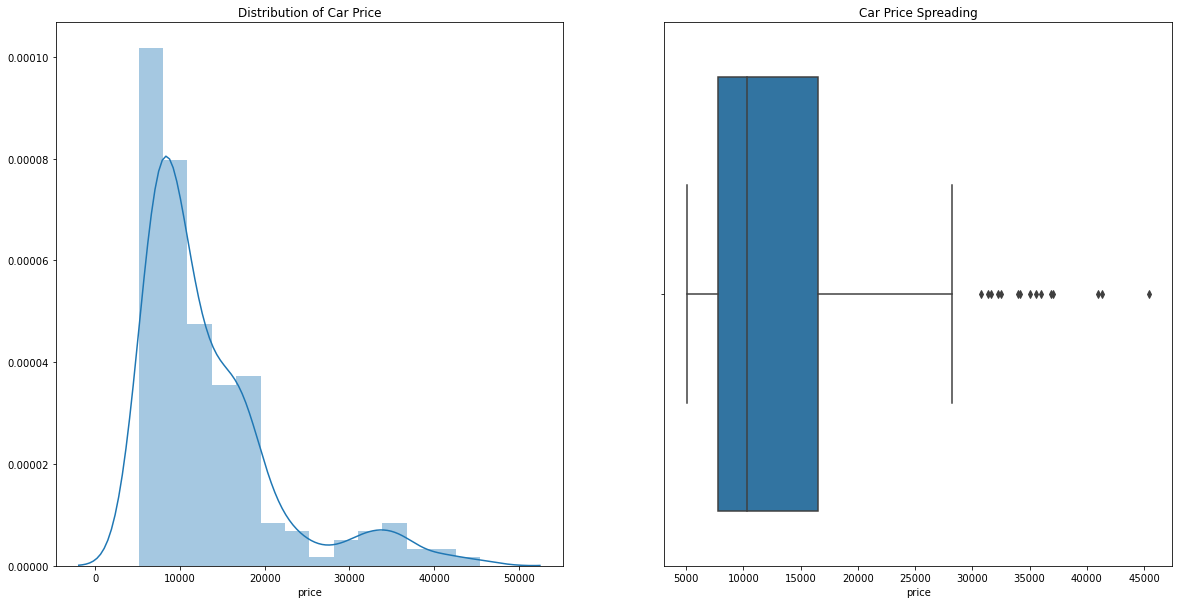

In [12]:
# Now let's analyze the car price distribution

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title("Distribution of Car Price")
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title("Car Price Spreading")
sns.boxplot(x=data.price)

In [13]:
data.price.describe(percentiles=[0,0.15,0.25, 0.50,0.60,0.6303,0.70,0.75,0.80,0.85,0.90,0.95,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
0%        5118.000000
15%       6968.600000
25%       7788.000000
50%      10295.000000
60%      12515.600000
63.0%    13255.214000
70%      15458.000000
75%      16503.000000
80%      17493.800000
85%      18500.000000
90%      22563.000000
95%      32472.400000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

In [14]:
print("Mean of Car Price : {} ".format(np.mean(data.price)))
print("Median of Car Price : {} ".format(np.median(data.price)))

Mean of Car Price : 13276.710570731706 
Median of Car Price : 10295.0 


In [15]:
# Observations :

# 1 --> there is a significant difference between mean and median of car price Distribution.

# 2 --> Car prices and between Min price = 5118 and max Price=45400.

# 3 --> The plot seemed to be right-skewed, meaning that the most prices are low (63.03% car prices are below mean price range)

# 4 --> price are spread far from the mean which indiacates high variance in dataset  

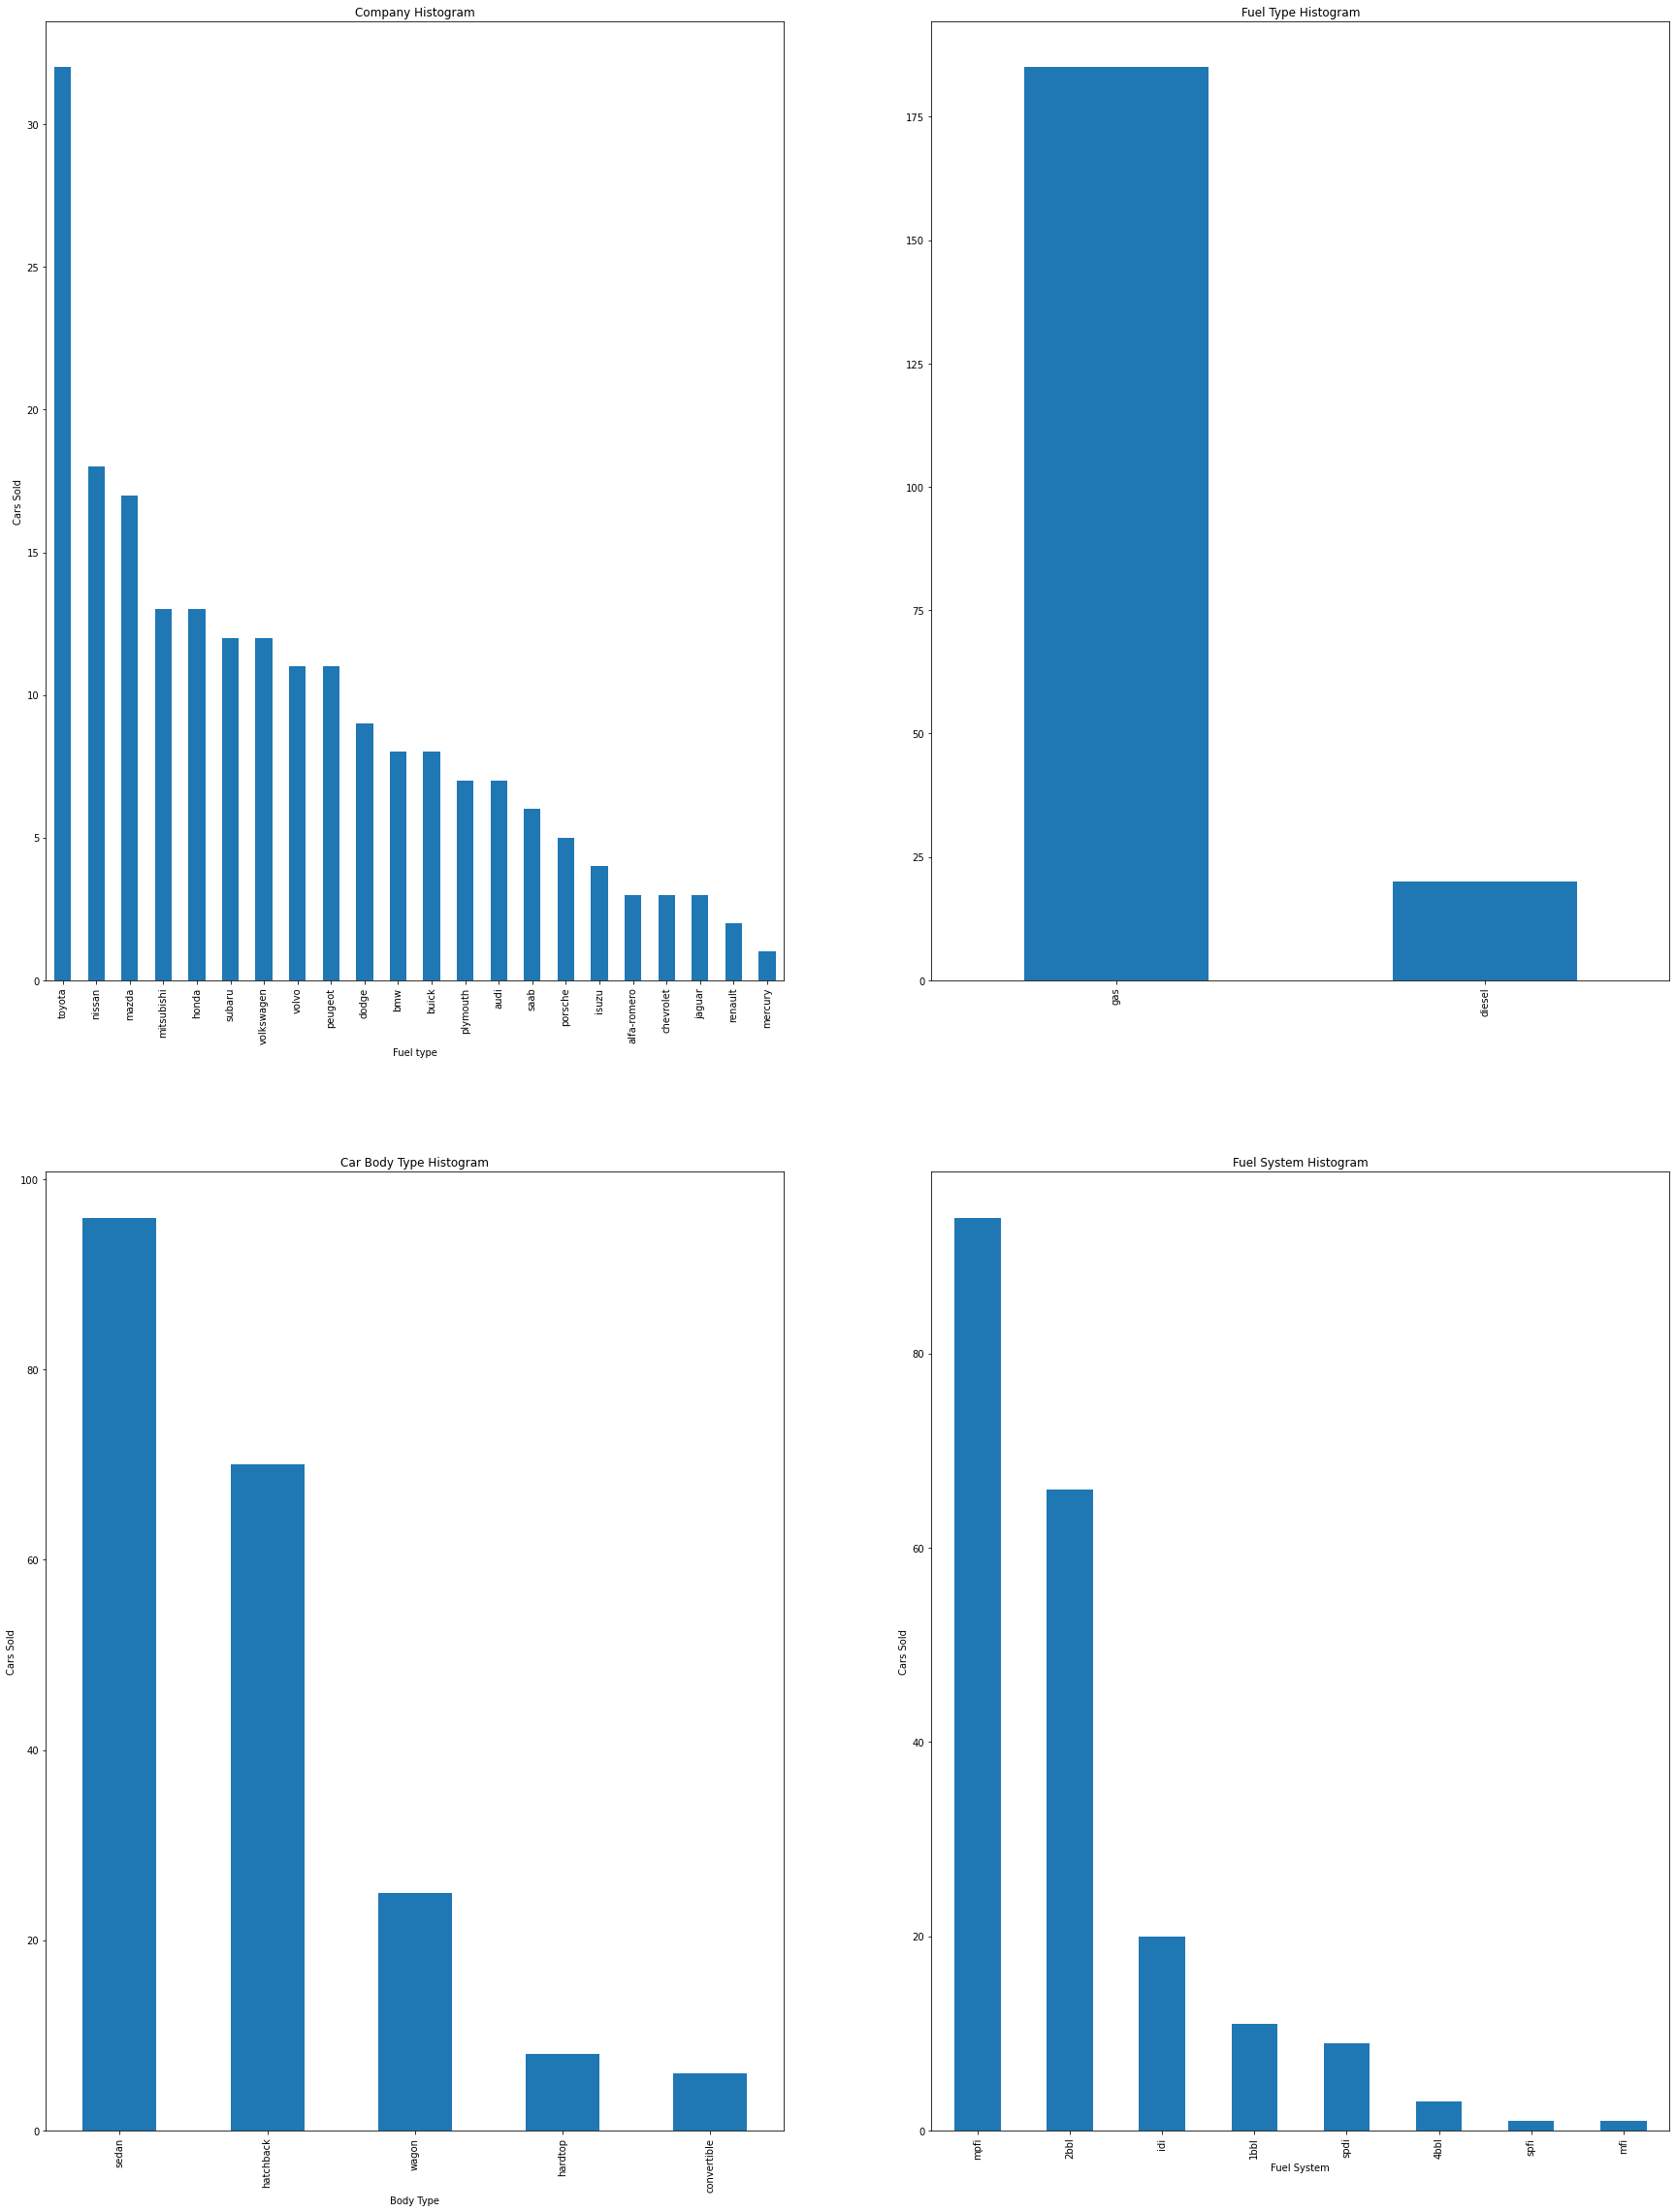

In [16]:
plt.figure(figsize=(30,40))

plt.subplot(2,2,1)
company_name = data.Company_Name.value_counts().plot(kind="bar")
plt.title("Company Histogram")
company_name.set(xlabel="Car Company",ylabel = "Cars Sold")

plt.subplot(2,2,2)
fuel_type = data.fueltype.value_counts().plot(kind="bar")
plt.title("Fuel Type Histogram")
company_name.set(xlabel="Fuel type",ylabel = "Cars Sold")


plt.subplot(2,2,3)
body_type = data.carbody.value_counts().plot(kind="bar")
plt.title("Car Body Type Histogram")
body_type.set(xlabel="Body Type",ylabel="Cars Sold")

plt.subplot(2,2,4)
fuel_system = data.fuelsystem.value_counts().plot(kind="bar")
plt.title("Fuel System Histogram")
fuel_system.set(xlabel="Fuel System",ylabel="Cars Sold")

plt.show()

In [17]:
# Observation : 

# 1 --> Toyota sold most cars
# 2 --> Cars with Fuel type as gas is customers favourite choice
# 3 --> Customers favourite car body type is Sedan
# 4 --> MPFI is the most sold Fuel System

In [18]:
    data.head()

,car_ID,symboling,Company_Name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


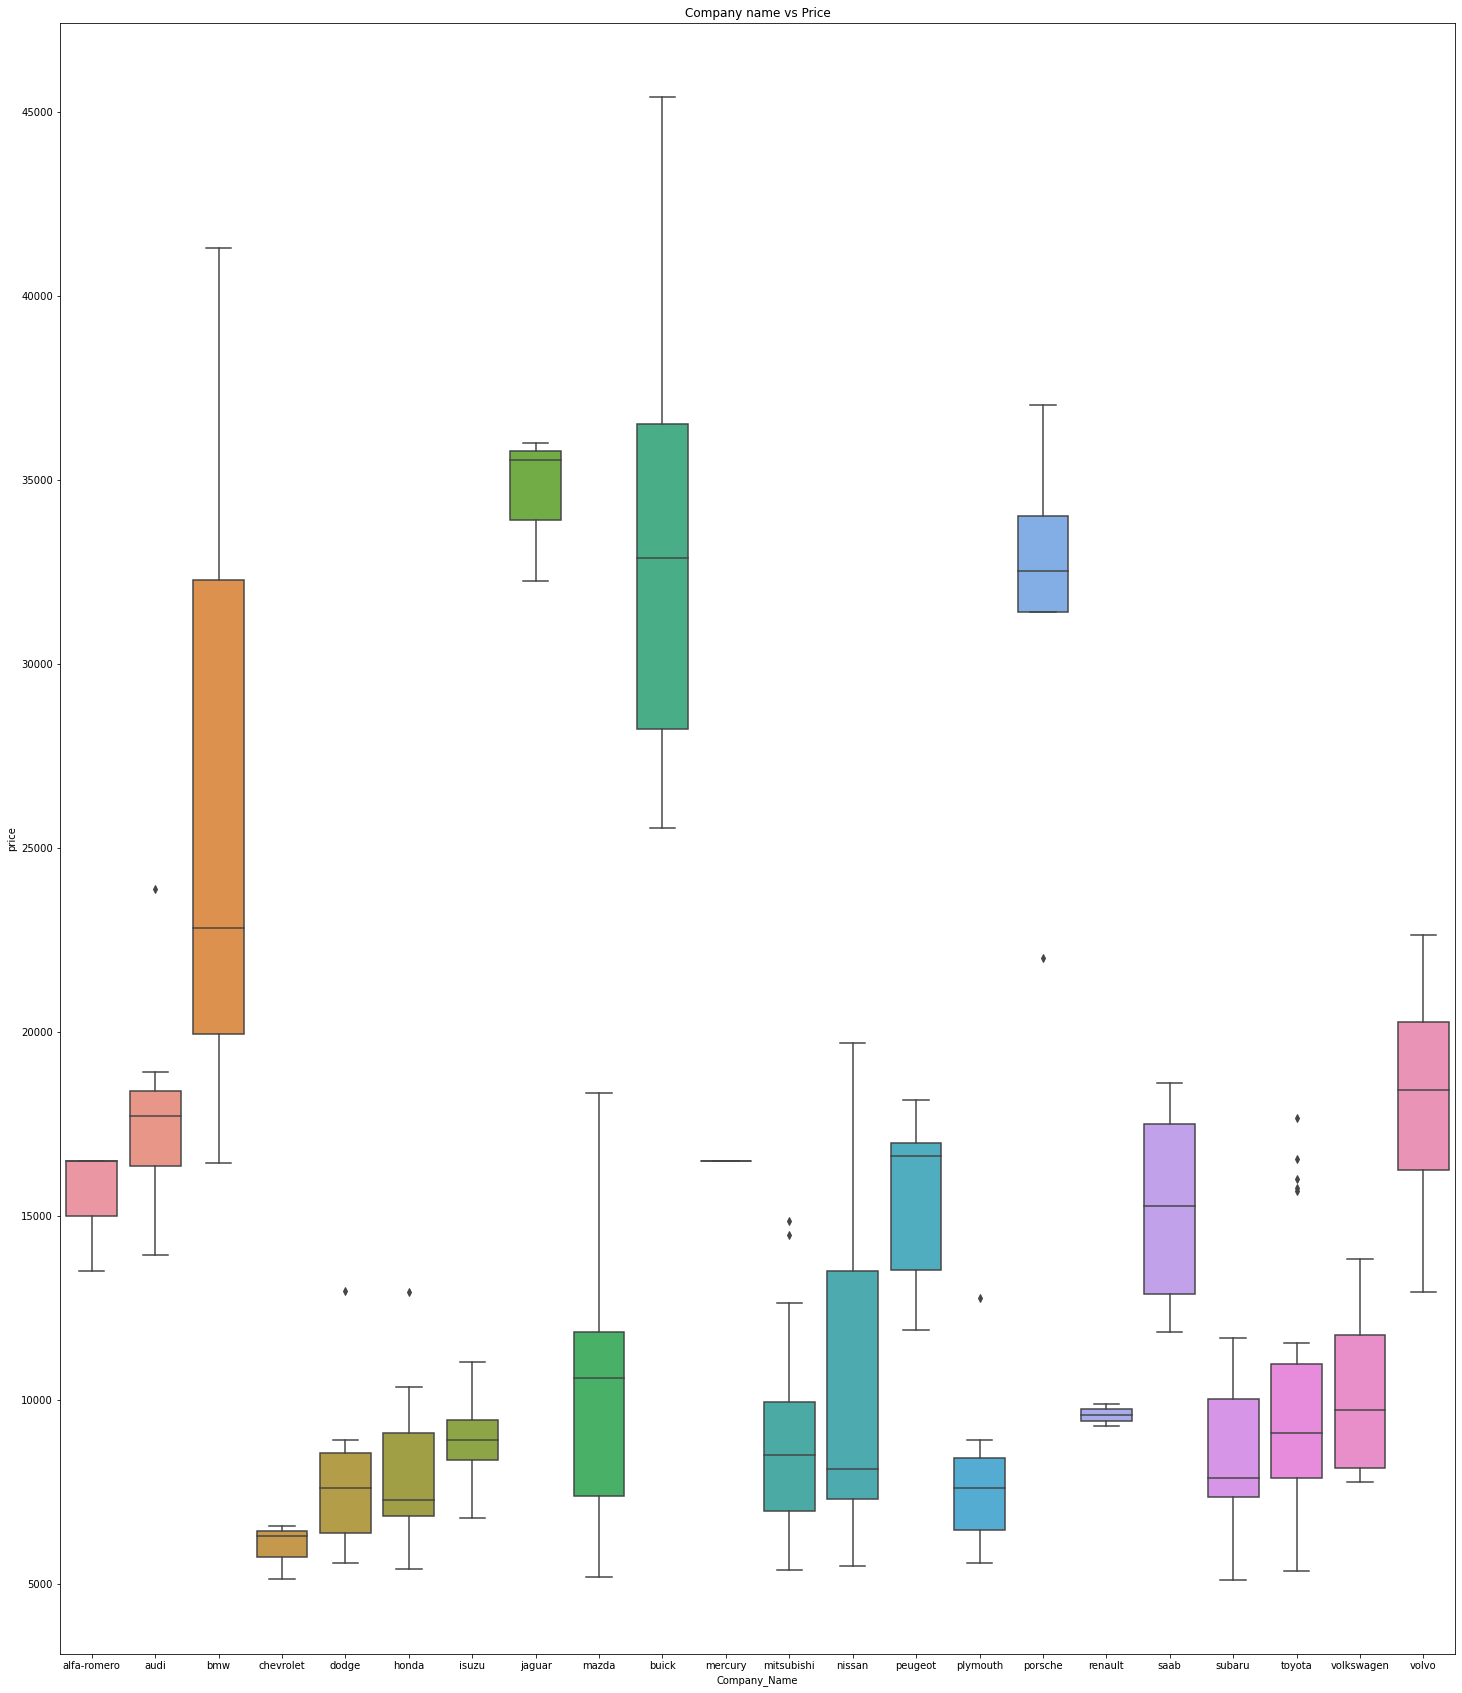

In [19]:
plt.figure(figsize=(25,30))
plt.title("Company name vs Price")
sns.boxplot(x = data["Company_Name"], y=data["price"])

In [20]:
# Observations

# 1 --> BMW has a highest price range
# 2 --> Chevrolet is cheap as comapre to others
# 3 --> Buick, Jaguar and porsche have high price cars

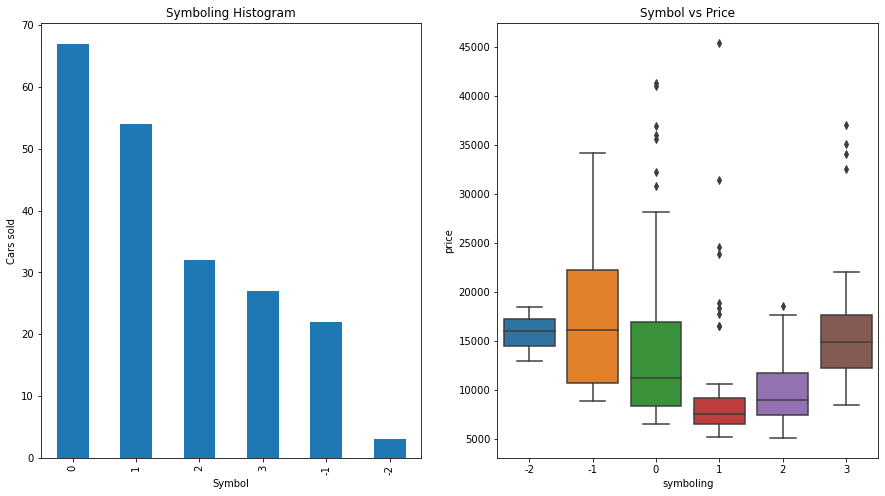

In [21]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
symbol = data.symboling.value_counts().plot(kind="bar")
plt.title("Symboling Histogram")
symbol.set(xlabel="Symbol", ylabel="Cars sold")

plt.subplot(1,2,2)
plt.title("Symbol vs Price")
sns.boxplot(x = data.symboling, y= data.price)


In [22]:
# Observation :

# 1 --> cars with symbol 0 and 1 are most sold
# 2 --> cars with symbol -1 are available in a large price range than others also this group has highest car price
# 3 --> cars with symbol 1 are cheaper than the others

<Figure size 1440x576 with 0 Axes>

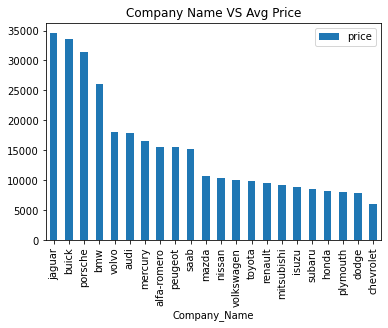

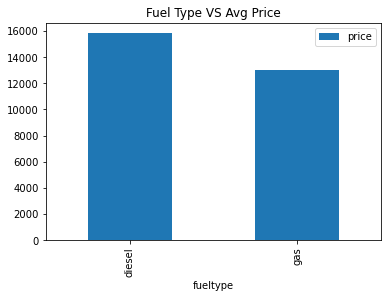

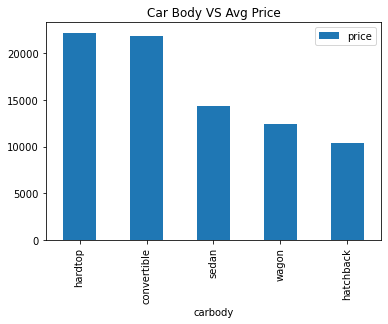

In [23]:
plt.figure(figsize=(20, 8))

company = pd.DataFrame(data.groupby("Company_Name")["price"].mean().sort_values(ascending=False))

fuel_type = pd.DataFrame(data.groupby("fueltype")["price"].mean().sort_values(ascending=False))

Body_type = pd.DataFrame(data.groupby("carbody")["price"].mean().sort_values(ascending=False))


company.plot.bar()
plt.title("Company Name VS Avg Price")
plt.show()


fuel_type.plot.bar()
plt.title("Fuel Type VS Avg Price")
plt.show()


Body_type.plot.bar()
plt.title("Car Body VS Avg Price")
plt.show()

In [24]:
# Observations

# 1 --> Jaguar, porsche, buick have highest avg price
# 2 --> DIsel cars have high avg prices
# 3 --> Hardtop, Convertable body type cars are the most sold

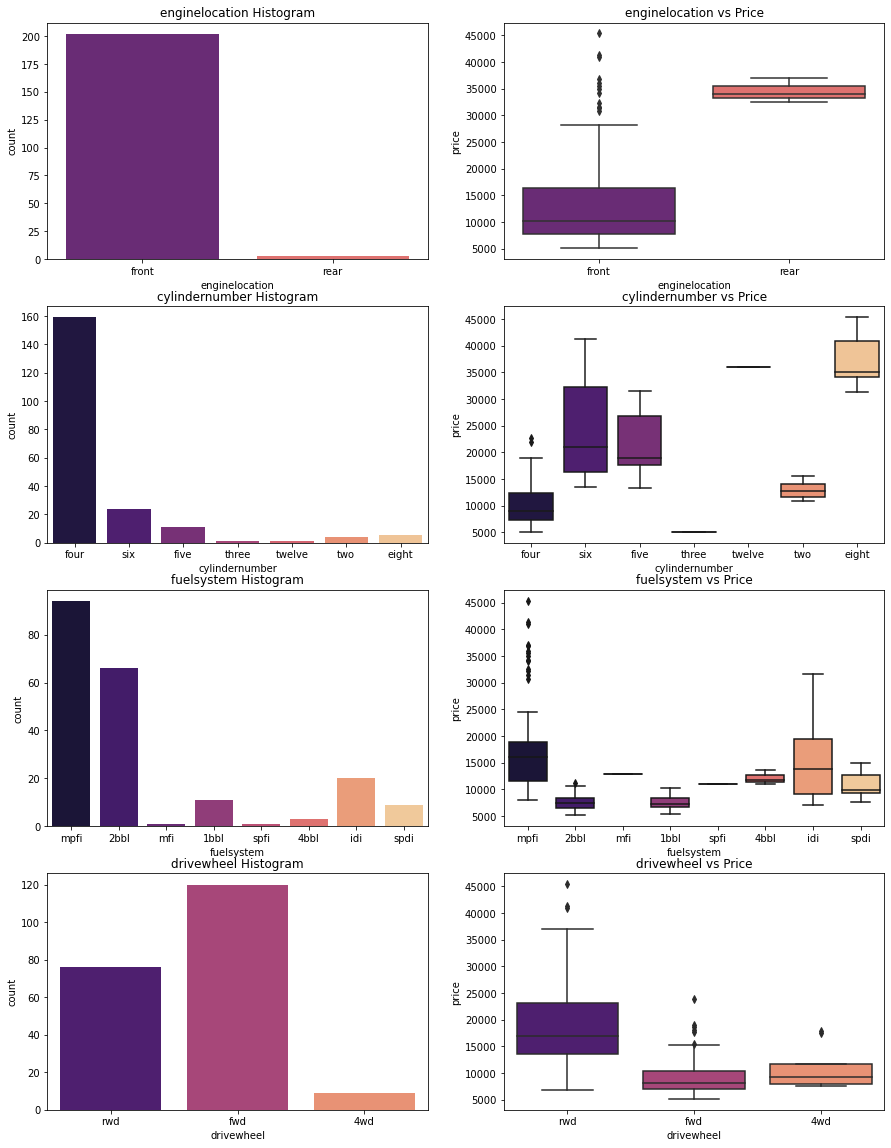

In [25]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(data[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=data[x], y=data.price, palette=("magma"))

    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

In [26]:
# Observations
#  1--> Cars with rear engine location have high price.
# 2 --> Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
# 3 --> mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
# 4 --> A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.


In [27]:
print(data.columns)
data.head()

Index(['car_ID', 'symboling', 'Company_Name', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


,car_ID,symboling,Company_Name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Text(0.5, 1.0, 'Power vs Price')

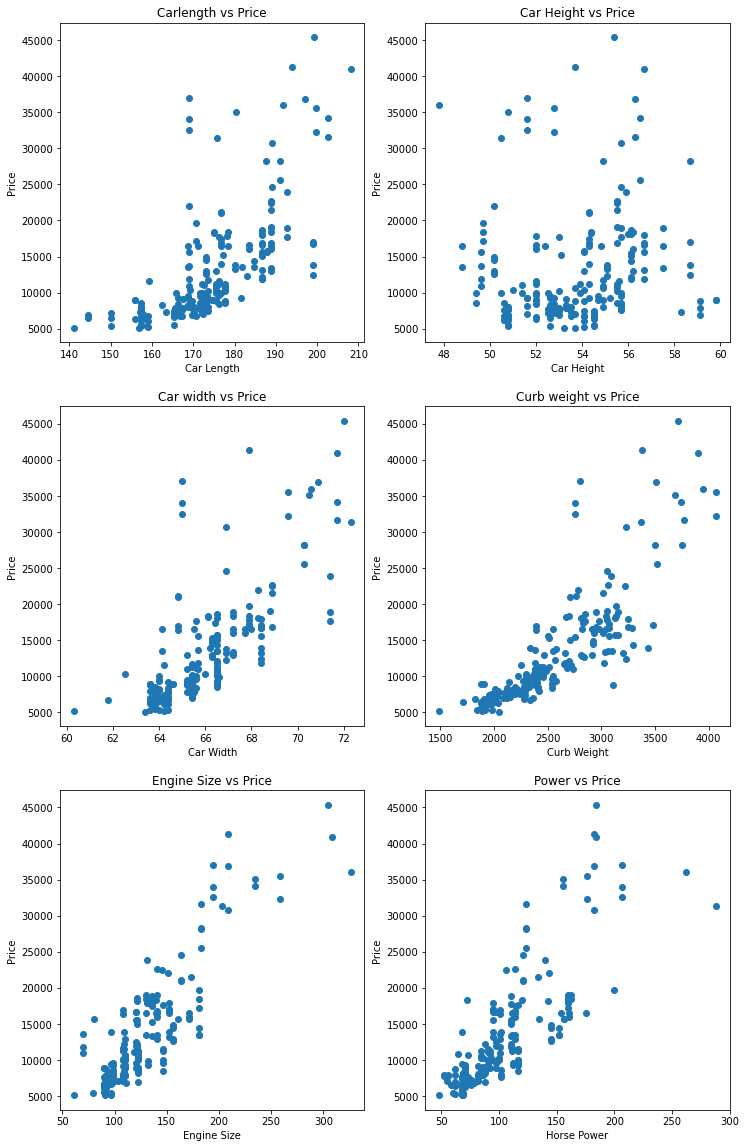

In [28]:
# Now Lets Analyze Numeriical Data

plt.figure(figsize=(12,20))

plt.subplot(3,2,1)
plt.scatter(x = data.carlength, y =data.price)
plt.xlabel("Car Length")
plt.ylabel("Price")
plt.title("Carlength vs Price")

plt.subplot(3,2,2)
plt.scatter(x = data.carheight, y =data.price)
plt.xlabel("Car Height")
plt.ylabel("Price")
plt.title("Car Height vs Price")

plt.subplot(3,2,3)
plt.scatter(x = data.carwidth, y =data.price)
plt.xlabel("Car Width")
plt.ylabel("Price")
plt.title("Car width vs Price")

plt.subplot(3,2,4)
plt.scatter(x = data.curbweight, y =data.price)
plt.xlabel("Curb Weight")
plt.ylabel("Price")
plt.title("Curb weight vs Price")

plt.subplot(3,2,5)
plt.scatter(x = data.enginesize, y =data.price)
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs Price")

plt.subplot(3,2,6)
plt.scatter(x = data.horsepower, y =data.price)
plt.xlabel("Horse Power")
plt.ylabel("Price")
plt.title("Power vs Price")

In [29]:
# Observations :

# 1 --> Car Height does not show any significance with price
# 2--> carwidth, carlength, curbweight, engine size and horse power seems to have a poitive correlation with price. 

Text(0.5, 1.0, 'Highway mpg vs Price')

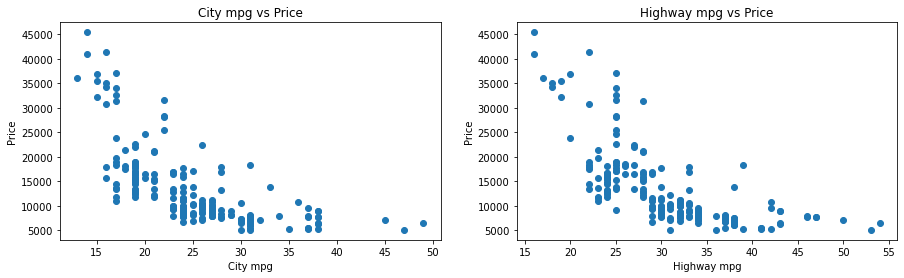

In [30]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.scatter(x = data.citympg, y =data.price)
plt.xlabel("City mpg")
plt.ylabel("Price")
plt.title("City mpg vs Price")

plt.subplot(1,2,2)
plt.scatter(x = data.highwaympg, y =data.price)
plt.xlabel("Highway mpg")
plt.ylabel("Price")
plt.title("Highway mpg vs Price")

In [31]:
# Observations :
# 1--> City mpg and Highway mpg seems to have negative significance with price

Text(0.5, 1.0, 'Car range vs price')

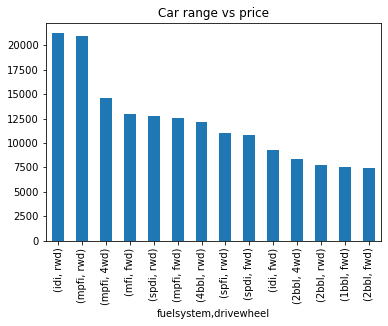

In [32]:
car_range = data.groupby(["fuelsystem","drivewheel"])["price"].mean().sort_values(ascending=False)

car_range.plot.bar()
plt.title("Car range vs price")

In [33]:
# Observation :

# 1 --> customers mostly prefer car with idi,fwd or mpfi,rwd

Text(0.5, 1.0, 'Wheel Base vs Price')

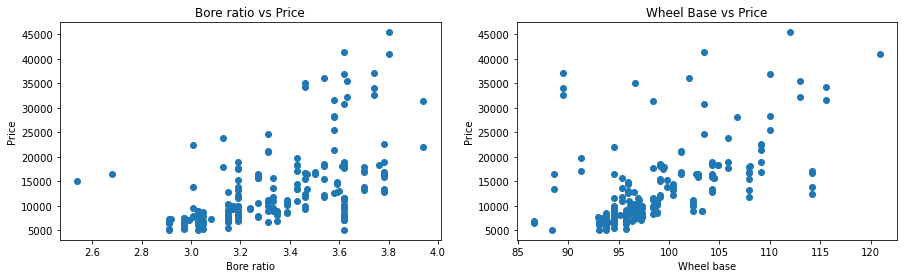

In [34]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.scatter(x = data.boreratio, y =data.price)
plt.xlabel("Bore ratio")
plt.ylabel("Price")
plt.title("Bore ratio vs Price")

plt.subplot(1,2,2)
plt.scatter(x = data.wheelbase, y =data.price)
plt.xlabel("Wheel base")
plt.ylabel("Price")
plt.title("Wheel Base vs Price")

In [35]:
# Observations

# Bore Ration and Wheel base seems to have positive corelation with Price

Text(0.5, 1.0, 'Compression Ratio vs Price')

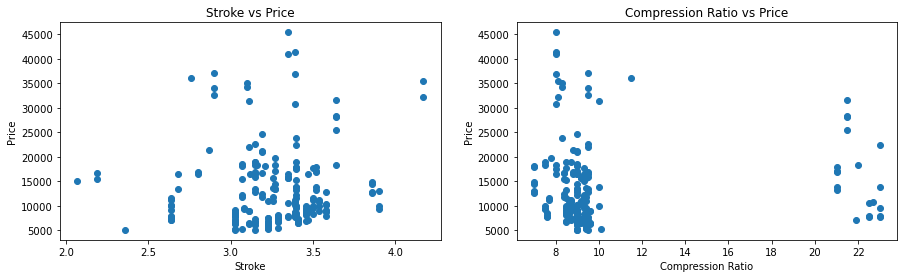

In [36]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.scatter(x = data.stroke, y =data.price)
plt.xlabel("Stroke")
plt.ylabel("Price")
plt.title("Stroke vs Price")

plt.subplot(1,2,2)
plt.scatter(x = data.compressionratio, y =data.price)
plt.xlabel("Compression Ratio")
plt.ylabel("Price")
plt.title("Compression Ratio vs Price")

In [37]:
# Observations

# Stoke and Compression doesnt seem to have correlation with price

In [38]:
# After Examination of all the features, we observed that following are the features that seems to have significance with price

In [39]:
# -Engine Type 
# - Fuel Type 
# - Car Body 
# - Aspiration 
# - Cylinder Number 
# - Drivewheel 
# - Curbweight 
# - Car Length
# - Car width
# - Engine Size 
# - Boreratio 
# - Horse Power 
# - Wheel base 
# - highwaympg
# - peakrpm

In [40]:
cars_data = data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'peakrpm','highwaympg', 'carlength','carwidth']]

In [42]:
cars_data.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,peakrpm,highwaympg,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,5000,27,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,5000,27,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,5000,26,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,5500,30,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,5500,22,176.6,66.4


In [43]:
def get_dummies(col,data):
    temp = pd.get_dummies(data[col],drop_first=True)
    data = pd.concat([data,temp],axis=1)
    data.drop([col],axis=1,inplace=True)
    return data

In [44]:
cars_data = get_dummies('fueltype',cars_data)
cars_data = get_dummies('aspiration',cars_data)
cars_data = get_dummies('carbody',cars_data)
cars_data = get_dummies('drivewheel',cars_data)
cars_data = get_dummies('enginetype',cars_data)
cars_data = get_dummies('cylindernumber',cars_data)


In [45]:
cars_data.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,peakrpm,highwaympg,carlength,carwidth,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,5000,27,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,5000,27,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,5000,26,171.2,65.5,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,5500,30,176.6,66.2,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,5500,22,176.6,66.4,...,1,0,0,0,1,0,0,0,0,0


In [46]:
# So we have created dummy variables for fueltype, aspiration,carbody,drivewheel,enginetype,cylindernumbers
# Now we will normalize the remaining columns [ 'price','wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 'peakrpm','highwaympg', 'carlength','carwidth']

In [47]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

rem_cols = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','peakrpm','highwaympg','carlength','carwidth']

cars_data[rem_cols] = scale.fit_transform(cars_data[rem_cols])

In [48]:
cars_data.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,peakrpm,highwaympg,carlength,carwidth,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,0.058309,0.411171,0.260377,0.664286,0.262500,0.346939,0.289474,0.413433,0.316667,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,0.058309,0.411171,0.260377,0.664286,0.262500,0.346939,0.289474,0.413433,0.316667,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,0.230321,0.517843,0.343396,0.100000,0.441667,0.346939,0.263158,0.449254,0.433333,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,0.384840,0.329325,0.181132,0.464286,0.225000,0.551020,0.368421,0.529851,0.491667,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,0.373178,0.518231,0.283019,0.464286,0.279167,0.551020,0.157895,0.529851,0.508333,...,1,0,0,0,1,0,0,0,0,0


In [49]:
# Now we will split you train and test set

X = cars_data.drop("price",axis=1)
Y = cars_data["price"]


x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [50]:
# RFE [Recursive Feature Elimination] and Linear Regression
#Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.
LinReg = LinearRegression()
LinReg.fit(x_train,y_train)

rfe = RFE(LinReg,10)
rfe.fit(x_train,y_train)

C:\Users\pprat\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LinearRegression(), n_features_to_select=10)

In [51]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 7),
 ('boreratio', False, 17),
 ('horsepower', True, 1),
 ('peakrpm', False, 8),
 ('highwaympg', True, 1),
 ('carlength', False, 9),
 ('carwidth', False, 10),
 ('gas', False, 18),
 ('turbo', False, 20),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 19),
 ('rwd', False, 14),
 ('dohcv', False, 4),
 ('l', False, 15),
 ('ohc', False, 2),
 ('ohcf', True, 1),
 ('ohcv', False, 11),
 ('rotor', False, 13),
 ('five', False, 3),
 ('four', True, 1),
 ('six', False, 5),
 ('three', False, 12),
 ('twelve', False, 6),
 ('two', False, 16)]

In [52]:
# RFE is having support for the below columns
x_train.columns[rfe.support_]

Index(['wheelbase', 'curbweight', 'horsepower', 'highwaympg', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'ohcf', 'four'],
      dtype='object')

In [53]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

,wheelbase,curbweight,horsepower,highwaympg,hardtop,hatchback,sedan,wagon,ohcf,four
3,0.384840,0.329325,0.225000,0.368421,0,0,1,0,0,1
157,0.265306,0.240884,0.091667,0.552632,0,1,0,0,0,1
81,0.282799,0.325834,0.166667,0.421053,0,1,0,0,0,1
32,0.206997,0.135376,0.050000,0.684211,0,1,0,0,0,1
99,0.309038,0.324282,0.204167,0.473684,0,1,0,0,0,1


In [54]:
def build_model(X,Y):
    X = sm.add_constant(X)
    LinReg = sm.OLS(Y,X).fit()
    print(LinReg.summary())
    return X

In [55]:
# # Variance Inflation Factor

# # This helps us to detect multocollinearity in regression, s
# # Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model;
# # it’s presence can adversely affect your regression results.
# The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model. 
#Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

def detect_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["VIF"] = round(vif["VIF"],2)
    vif = vif.sort_values(by="VIF",ascending=False)
    return vif

In [56]:
X_train_new = build_model(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     94.63
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           2.74e-60
Time:                        12:49:51   Log-Likelihood:                -1538.0
No. Observations:                 164   AIC:                             3098.
Df Residuals:                     153   BIC:                             3132.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7824.7525   2236.112      3.499      0.0

In [57]:
# ohcf seems to have higher significance than the oathers. hence dropping it as it is insignificant in presence of other features

In [58]:
x_train_new = x_train_rfe.drop(["ohcf"],axis=1)

In [59]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     103.6
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           1.06e-60
Time:                        12:50:02   Log-Likelihood:                -1539.5
No. Observations:                 164   AIC:                             3099.
Df Residuals:                     154   BIC:                             3130.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8369.3759   2225.891      3.760      0.0

In [60]:
x_train_new = x_train_new.drop(["wheelbase"],axis=1)

In [61]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.4
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           1.52e-60
Time:                        12:50:18   Log-Likelihood:                -1542.4
No. Observations:                 164   AIC:                             3103.
Df Residuals:                     155   BIC:                             3131.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7672.6436   2239.430      3.426      0.0

In [63]:
x_train_new =x_train_new.drop(["highwaympg"],axis=1)

In [62]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.4
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           1.52e-60
Time:                        12:50:32   Log-Likelihood:                -1542.4
No. Observations:                 164   AIC:                             3103.
Df Residuals:                     155   BIC:                             3131.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7672.6436   2239.430      3.426      0.0

In [63]:
# calculate VIF

detect_VIF(x_train_new)

,Features,VIF
0,const,89.95
6,sedan,9.10
5,hatchback,8.34
7,wagon,4.96
1,curbweight,3.73
2,horsepower,3.69
3,highwaympg,3.16
8,four,1.90
4,hardtop,1.78


In [64]:
# Sedan seems to have high multicollinearity. Hence dropping it

x_train_new = x_train_new.drop("sedan",axis=1)

In [65]:
x_train_new = build_model(x_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     116.3
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           1.35e-58
Time:                        12:50:53   Log-Likelihood:                -1549.8
No. Observations:                 164   AIC:                             3116.
Df Residuals:                     156   BIC:                             3140.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3025.7208   1958.782      1.545      0.1

In [66]:
x_train_new = x_train_new.drop("hardtop",axis=1)

In [67]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     136.5
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           1.14e-59
Time:                        12:51:03   Log-Likelihood:                -1549.8
No. Observations:                 164   AIC:                             3114.
Df Residuals:                     157   BIC:                             3135.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3032.9167   1952.784      1.553      0.1

In [68]:
detect_VIF(x_train_new)

,Features,VIF
0,const,63.31
1,curbweight,3.61
2,horsepower,3.50
3,highwaympg,3.12
6,four,1.89
4,hatchback,1.23
5,wagon,1.18


In [69]:
# Dropping curbweight to check the changes

x_train_new = x_train_new.drop("curbweight",axis=1)

In [70]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     101.8
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           1.42e-47
Time:                        12:51:29   Log-Likelihood:                -1581.6
No. Observations:                 164   AIC:                             3175.
Df Residuals:                     158   BIC:                             3194.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.356e+04   1842.725      7.361      0.0

In [71]:
x_train_new = x_train_new.drop("highwaympg",axis=1)
detect_VIF(x_train_new)

,Features,VIF
0,const,16.56
1,horsepower,1.78
4,four,1.78
2,hatchback,1.09
3,wagon,1.09


In [72]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     126.8
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           2.09e-48
Time:                        12:52:09   Log-Likelihood:                -1582.2
No. Observations:                 164   AIC:                             3174.
Df Residuals:                     159   BIC:                             3190.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.207e+04   1208.852      9.985      0.0

In [73]:
x_train_new = x_train_new.drop("wagon",axis=1)
detect_VIF(x_train_new)

,Features,VIF
0,const,16.19
1,horsepower,1.78
3,four,1.78
2,hatchback,1.00


In [74]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     167.6
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           3.68e-49
Time:                        12:52:21   Log-Likelihood:                -1583.1
No. Observations:                 164   AIC:                             3174.
Df Residuals:                     160   BIC:                             3187.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.183e+04   1198.481      9.868      0.0

In [75]:
# So our model with these feartures looks good
# so we will design our model with the above features

LinReg = sm.OLS(y_train,x_train_new).fit()

price_predictions = LinReg.predict(x_train_new)

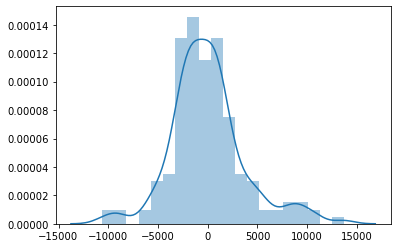

In [76]:
sns.distplot((y_train-price_predictions),bins=20)

In [77]:
# Error terms seem to be approximately normally distributed, so our selected features looks good for model

In [78]:
# Now lets make predictions
x_train_new.head()

,const,horsepower,hatchback,four
3,1.0,0.225000,0,1
157,1.0,0.091667,1,1
81,1.0,0.166667,1,1
32,1.0,0.050000,1,1
99,1.0,0.204167,1,1


In [79]:
x_train_new = x_train_new.drop("const",axis=1)

In [80]:
x_test_new = x_test[x_train_new.columns]

In [81]:
x_test_new = sm.add_constant(x_test_new)
x_test_new.head()

,const,horsepower,hatchback,four
160,1.0,0.091667,0,1
186,1.0,0.154167,0,1
59,1.0,0.150000,1,1
165,1.0,0.266667,0,1
140,1.0,0.104167,1,1


In [82]:
predicted_car_price = LinReg.predict(x_test_new)

In [83]:
# Checking the fitness of the curve

r2_score(y_test,predicted_car_price)

0.7079762337674445

Text(0.5, 1.0, 'y_test vs predicted car price')

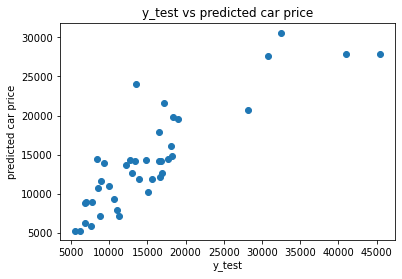

In [84]:
plt.scatter(y_test,predicted_car_price)
plt.xlabel("y_test")
plt.ylabel("predicted car price")
plt.title("y_test vs predicted car price")

In [85]:
print(LinReg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     167.6
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           3.68e-49
Time:                        12:52:34   Log-Likelihood:                -1583.1
No. Observations:                 164   AIC:                             3174.
Df Residuals:                     160   BIC:                             3187.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.183e+04   1198.481      9.868      0.0